## HW 4 Probabilistic Models
## Joby George (jg6615)

## Due 3/23/2022





# Problem 1 Prompt:

Prove equivalence of ERM for binary classification using logistic loss and probabilistic approach to logistic regression results in the same minimization problem

## Problem 1 Answer

### MLE Expression for logistic Regression

Using slides 45 and 46 from week two of lecture, we know the logistic log function is 
$$ L(\theta) = \frac{1}{n}\sum_i^{n}log(1 +e^{-m}) \space and $$

where n = the number of data points

$$ m =  y_i\theta^{T} x_i $$

Which is equivalent to:

$$ L(\theta) = \frac{1}{n}\sum_i^{n}log(1 +e^{-y_i\theta^{T}x_i}) \space \text  where \space y \space \in {-1,1}$$

Which is the expression we would like to minimize to minimize empirical risk.

### Negative Log-likelihood for logistic regression

### Case 1 Y_i = 0, (-1 in MLE Outcome Space) 

From slide 19 we observe the log-likelihood we would like to maximize:

$$NLL = -\sum_{i}^{n}y_{i} log(f(\theta^{T}x_{i}))+(1-y_{i})(log(1−f(\theta^{T}x_{i})) \space where \space y_{i} \space \in {0,1} \space and$$

$$f(\eta) = \frac{1}{1+e^{\eta}}$$

if $y_{i}$ = 0, we observe this to be:

$$NLL = \sum_{i}^{n}-log(1-f(\theta^{T}x_{i})) \space $$


plugging  in our logistic link function, if $y_{i}$ = 0 we get:

$$NLL = \sum_{i}^{n}-log(1-\frac{1}{1+e^{(-\theta^{T}x_{i})}}) \space $$

setting a common denominator and expanding our logistic, we get: 
$$NLL = \sum_{i}^{n}-log(\frac{1+e^{(-\theta^{T}x_{i})}-1}{1+e^{(-\theta^{T}x_{i})}}) \space $$

simplifying this we get 
$$NLL = \sum_{i}^{n}-log(\frac{e^{(-\theta^{T}x_{i})}}{1+e^{(-\theta^{T}x_{i})}}) \space $$

multiplying the numerator and denominator by one, expressed as:
$$\frac{e^{(\theta^{T}x_{i})}}{e^{(\theta^{T}x_{i})}}$$

we get:

$$NLL = \sum_{i}^{n}-log(\frac{e^{0}}{(1+e^{(-\theta^{T}x_{i})})   (e^{(\theta^{T}x_{i})})}) \space $$


which simplifies to 
$$NLL = \sum_{i}^{n}-log(\frac{1}{1+e^{(\theta^{T}x_{i})}}) \space $$

if we apply the negative sign to the log by taking the reciprocal of it's input, and scale it by a factor of $\frac{1}{n}$ we end with our final expression:

$$NLL = \frac{1}{n}\sum_{i}^{n}log(1+e^{\theta^{T}x_{i}})$$

This is equivalent to the MLE when $y_{i}$ = -1:

$$ L(\theta) = \frac{1}{n}\sum_i^{n}log(1 +e^{\theta^{T}x_i}) $$

### Case 1 Y_i = 1, (1 in MLE Outcome Space) 


$$NLL = \sum_{i}^{n}-log(f(\theta^{T}x_{i})) \space $$

plugging  in our logistic link function, if $y_{i}$ = 1 we get:

$$NLL = \sum_{i}^{n}-log(\frac{1}{1+e^{(-\theta^{T}x_{i})}}) \space $$

if we apply the negative sign to the log by taking the reciprocal of it's input, and scale it by a factor of $\frac{1}{n}$ we end with our final expression:

$$NLL = \frac{1}{n} \sum_{i}^{n}log(1+e^{(-\theta^{T}x_{i})}) \space $$

This is equivalent to the MLE when $y_{i}$ = 1:

$$ L(\theta) = \frac{1}{n}\sum_i^{n}log(1 +e^{-\theta^{T}x_i}) $$

### Q.E.D

# Problem 2 Prompt:

Show that the decision boundary of logistic regression is given by x : $x^T$w = 0. Note that the set will not change if we multiply the weights by some constant c.

# Problem 3 Prompt:
Assume the data are linearly seperable and we have reached a $\hat{w}$ that perfectly classifies the data. 
Show that we can always increase the likelihood of the data by multiplying a scalar c on $\hat{w}$, which means that MLE is not well-defined in this case. (Hint: You can show this by taking the derivative of L(c$\hat{w}$) with respect to c, where L is the likelihood function.)

# Problem 4 Prompt:

Prove the objective function $J_{logistic}$ is convex.


# Problem 5 Prompt

Complete the f objective function in the skeleton code, which computes the objective function for $J_{logistic(w)}$. (Hint: you may get numerical overflow when computing the exponential literally, e.g. try $e^{1000}$ in Numpy. Make sure to read about the log-sum-exp trick and use the numpy function logaddexp to get accurate calculations and to prevent overflow.

## Problem 5 answer 
Done below

In [128]:
import numpy as np
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n = X.shape[0]
    scalar = 1/n
    loss = 0
    for i in range(n):
        """
        logaddexp adds the log(e^(input1), e^input2)
        since we want it to be log(1+e^(-y*theta^Tx)) we need to actually pass
        0 in as our first input so e^(0) = 1
        """
        loss+=np.logaddexp(0,-y[i]*np.dot(theta,X[i]))
    loss*=scalar
    return(loss+l2_param*np.dot(theta,theta))
    
    


# Problem 6 Prompt

Complete the fit logistic regression function in the skeleton code using the minimize function from scipy.optimize. Use this function to train a model on the provided data. Make sure to take the appropriate preprocessing steps, such as standardizing the data and adding a column for the bias term.

## Problem 6 Answer

        function completed in the next cell
        data loading and preprocessing completed in the cell after 
        training the model done in the third cell down

In [129]:
### Finishing the function
from scipy.optimize import minimize
from functools import partial
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    """logic
            create an initial feature vector of 1's
            create a partial objective function using functools.partial that passes in our 
            X data, Y data and l2 parameter
            call scipy.optimize.minimize on the objective function passing in our initial
            feature vector
            return the optimized weights
    """

    num_feats = X.shape[1]
    w_initial = np.ones(num_feats)
    obj_func = partial(objective_function, X=X, y=y, l2_param=l2_param)
    """
    minimize function takes in the function to minimize, with an initial weight vector guess
    the optimal feature values are obtained with the .x attribute
    """
    w_star = minimize(obj_func,w_initial).x
    return(w_star)
    

In [130]:
### loading and cleaning data
path = 'logistic-code/'
file_names = ['X_train.txt', 'X_val.txt', 'y_train.txt', 'y_val.txt']
path_list = [path + file_name for file_name in file_names]

for i in range(len(path_list)):
    if i == 0:
        with open(path_list[i]) as textFile:
            x_train = [line.split() for line in textFile]
        #change data type to reflect an array as data are comma seperated
        x_train = [[float(value) for value in row[0].split(',')] for row in x_train]
    elif i == 1:
        with open(path_list[i]) as textFile:
            x_val = [line.split() for line in textFile]
        x_val = [[float(value) for value in row[0].split(',')] for row in x_val]
    elif i == 2:
        with open(path_list[i]) as textFile:
                y_train = [line.split() for line in textFile]
        y_train = [[float(value) for value in row[0].split(',')] for row in y_train]
    else:
        with open(path_list[i]) as textFile:
            y_val = [line.split() for line in textFile]
        y_val = [[float(value) for value in row[0].split(',')] for row in y_val]

            
        
#convert data into numpy arrays
x_train, x_val, y_train, y_val,   = np.array(x_train), np.array(x_val), np.array(y_train), np.array(y_val)

#preprocessing the data: standardizing the input data
from sklearn.preprocessing import StandardScaler

SS = partial(StandardScaler().fit_transform)

x_train, x_val = SS(x_train), SS(x_val)

##preprocessing the data: adding a bias column to x_train and x_val using np.hstack()
x_train = np.hstack((x_train, np.ones((x_train.shape[0],1))))
x_val = np.hstack((x_val, np.ones((x_val.shape[0],1))))

##change y train and val labels to -1 from 0
y_train[y_train == 0 ] = -1
y_val[y_val==0] = -1

In [131]:
theta = fit_logistic_reg(x_train, y_train, f_objective, l2_param =1)

# Problem 7 Prompt

Find the L2 regularization parameter that minimizes the log-likelihood on the validation set. Plot the log-likelihood for different values of the regularization parameter.

## Problem 7 Answer
done below 


In [147]:
def negative_log_likelihood(theta,X,y):
    n = X.shape[0]
    loss = 0
    for i in range(n):
        loss +=np.logaddexp(0,-y[i]*np.dot(theta,X[i]))
    return(-loss)

##initially started with a linspace between 0 and 2 
#and noticed decreasing validation performance, so did a narrower range between 0-.1

#lambda_list = np.linspace(0,2,10)
lambda_list = np.arange(0,.1,.01)


result_dict = dict()
for lam in lambda_list:
    theta = fit_logistic_reg(x_train, y_train,f_objective, l2_param=lam)
    result_dict[lam] = negative_log_likelihood(theta,x_val,y_val)
    

Text(0, 0.5, 'negative log likelihood')

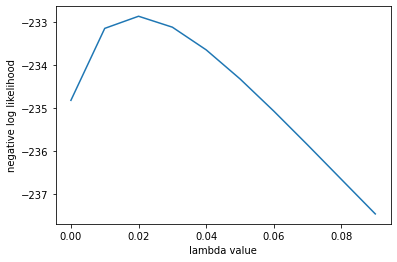

In [148]:
import matplotlib.pyplot as plt
x_axis = list(result_dict.keys())
y_values = list(result_dict.values())
plt.plot(x_axis,y_values)
plt.xlabel('lambda value')
plt.ylabel('negative log likelihood')

In [151]:
max(result_dict, key=result_dict.get)
#optimal lambda = .02

0.02

# Problem 8 Prompt

Plot the calibration of your model's probabilistic output. Calibration refers to the proportion of Y = 0 events occur for a given model score (i.e. if the score is .3, we would expect 30% of events to have a label of 0)

# Problem 9

Consider flipping a biased coin where p (z= H| $\theta_{1}$) =  $\theta_{1}$. However, we can't observe the flip directly, and have it reported to us. There is a probability the report is incorrect **if the outcome is a head**, denoted by x: p(x = H|z=H,$\theta_{2}$) = $\theta_{2}$. If the outcome is a tails, it will always be correctly reported.

**Show that P(x=h|$\theta_{1}$.$\theta_{2}$) = $\theta_{1}$$\theta_{2}$**

The probability of the report being heads, given the probability of the coin is heads ($\theta_{1}$) and the probability of the report being accurate is ( $\theta_{2}$)

## Problem 9 answer

We know that if the report was heads, the outcome of the coin flip **must have been a heads**, which has a probability of $\theta_{1}$.

Given an outcome of the event was heads, the report will take value of heads with probability of $\theta_{2}$

Therefore the probability of observing a reported heads, would be the probability of the coin flipping heads, multiplied by the probability that the report is heads given a heads outcome:

$\theta_{1}$ * $\theta_{2}$

## Q.E.D

# Problem 10 Prompt
Given a set of reported results $D_{r}$ of size N, where r = the number of reported heads = h and the number of reported tails = t, what is the likelihood of $D_{r}$ as a function of $\theta_{1}$ and $\theta_{2}$

## Problem 10 Answer

$$L(D_{r}) = P(x=H | \theta_{1}, \theta_{2})^{r}*P(x=T|\theta_{1}, \theta_{2})^{t} $$

$$P(x=H | \theta_{1}, \theta_{2})^{r} = (\theta_{1}\theta_{2})^{r}$$
$$P(x=T | \theta_{1}, \theta_{2})^{r} = (1-\theta_{1})^{t}(1-\theta_{2})^{r}$$

Therefore 
$$L(D_{r}) =(\theta_{1}\theta_{2})^{r}(1-\theta_{1})^{t}(1-\theta_{2})^{r}$ $$

### Q.E.D.

# Problem 11 Prompt
Can we estimate $\theta_{1}$ and $\theta_{2}$ using MLE, explain your judgment

## Problem 11 answer

We cannot adequately estimate these two parameters with MLE, as cannot understand the relati